In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [2]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        
                       

                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        if label == 'PetImages/Cat':

                            self.training_data.append([np.array(img), np.eye(2)[0]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                        elif label == 'PetImages/Dog':
    
                            self.training_data.append([np.array(img), np.eye(2)[1]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)
        return self.training_data

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    training_data = dogsvcats.make_training_data()
    print('done')

PetImages/Cat


100%|██████████| 12501/12501 [00:53<00:00, 234.73it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:59<00:00, 209.23it/s]

Cats: 12476
Dogs: 12470
done


In [4]:
print(training_data[0])

[array([[149, 149, 150, ..., 145, 145, 145],
       [149, 149, 149, ..., 144, 144, 144],
       [149, 149, 149, ..., 142, 142, 142],
       ...,
       [136, 119, 109, ..., 119, 126, 122],
       [135, 108, 101, ..., 135, 123, 116],
       [108, 106, 105, ..., 124, 126, 125]], dtype=uint8), array([1., 0.])]


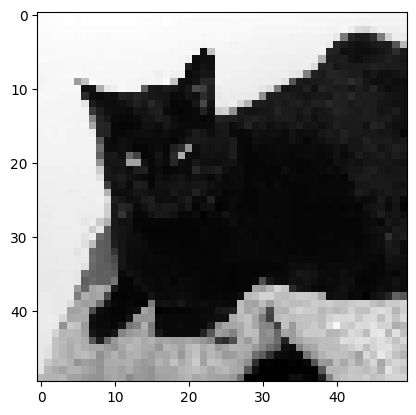

In [5]:
import matplotlib.pyplot as plt


plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(512,512)
        self.fc2 = nn.Linear(512,2)

        # x = torch.radn(50,50).view(-1,1,50,50)
        # self._to_linear = None
        # self.convs(x)

    def convs(self,x):
            x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

            # if self._to_linear is None:
            #     self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            return x

    def forward(self,x):
            x = self.convs(x)
            x = x.view(-1,512)
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return F.softmax(x, dim=1)

net = Net()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1

val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28008\3679591585.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


In [8]:
train_X = X[:-1*val_size]
train_y = y[:-1*val_size]

test_X = X[-1*val_size:]
test_y = y[-1*val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [9]:
BATCH_SIZE = 100
EPOCHS = 6

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

100%|██████████| 225/225 [01:12<00:00,  3.10it/s]


Epoch: 0. Loss: 0.2187432199716568


100%|██████████| 225/225 [01:16<00:00,  2.95it/s]


Epoch: 1. Loss: 0.19163617491722107


100%|██████████| 225/225 [01:07<00:00,  3.35it/s]


Epoch: 2. Loss: 0.1605970710515976


100%|██████████| 225/225 [01:08<00:00,  3.27it/s]


Epoch: 3. Loss: 0.1682358831167221


100%|██████████| 225/225 [01:07<00:00,  3.31it/s]


Epoch: 4. Loss: 0.1544009894132614


100%|██████████| 225/225 [01:08<00:00,  3.31it/s]

Epoch: 5. Loss: 0.12757077813148499


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
        total+=1

print('Accuracy: ', round(correct/total,3))

100%|██████████| 2494/2494 [00:05<00:00, 473.92it/s]

Accuracy:  0.733
